© Explore Data Science Academy

---
### Honour Code

I {**Emmanuel Uloko**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract

## Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

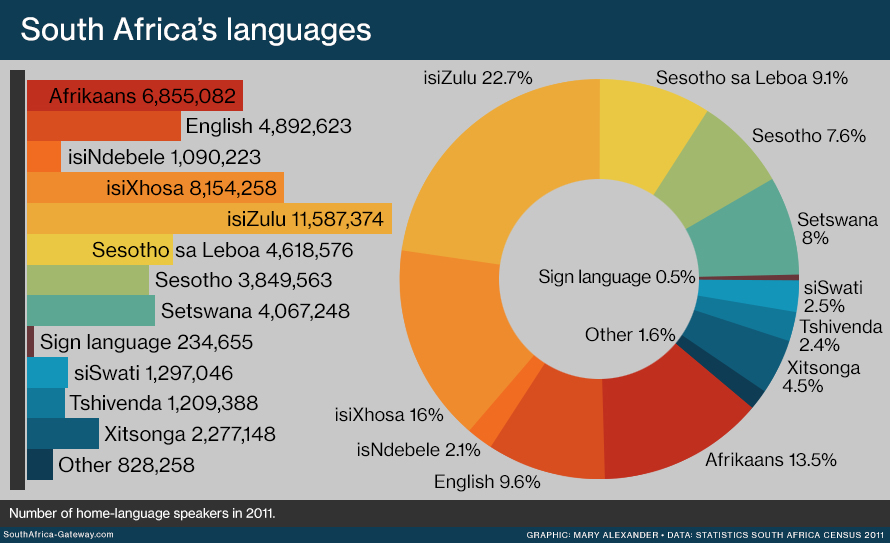

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Pre-processing of the datasets</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>
<a href=#seven>9. Conclusion</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [438]:
# Libraries for data loading, data manipulation and data visualisation
import pandas as pd      
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Importing pre-process packages
import re
import nltk   #Importing nltk for preprocessing the datasets
from nltk.corpus import stopwords  #importing Stopwords
sns.set()   # setting plot style
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

#Importing data engineering packages
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

# Model performance metric libraries
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are going to load the data from the `train` and  `test_with_no_labels` file into DataFrames. |

---

In [297]:
#Loading the train dataset
df_train = pd.read_csv('train_set.csv')
df_train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [298]:
df_train.shape

(33000, 2)

In [299]:
#Loading the test dataset
df_test = pd.read_csv('test_set.csv')
df_test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [300]:
df_test.shape

(5682, 2)

<a id="three"></a>
## 3. Pre-processing of the datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Pre-processing of the datasets ⚡ |
| :--------------------------- |
| In this section we are going to perform thorough cleaning of the dataset. Since it is text data, we are going to use the Natural Language Processor (NLP) for this pre-process phase.

---

# TRAIN DATASET PREPROCESSING

In [305]:
all_train = []
for i, row in df_train.iterrows():
    for message in row['text'].split('|||'):
        all_train.append([row['lang_id'], message])
all_train = pd.DataFrame(all_train, columns=['lang_id', 'text'])

In [306]:
#checking to see the list of labels
label_list = list(df_train.lang_id.unique())
label_list

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

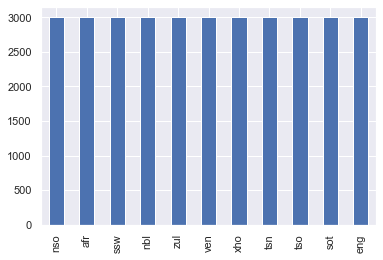

In [307]:
#checking the distribution of the classes
df_train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

From our distribution, it can be seen that the label data are balanced. This would ensure there is no bias in the prediction.

In [308]:
#Splitting to feature and label
df_train['text']

0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        o netefatša gore o ba file dilo ka moka tše le...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, Length: 33000, dtype: object

In [309]:
#Removing noise from the train dataset
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_train['text'] = df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [310]:
#checking the train dataset to see if the noise were removed
all_train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [311]:
#converting all train text to lower case 
all_train['text'] = all_train['text'].str.lower()

In [273]:
#function for removing punctuation
def remove_punctuation(text):
    return ''.join([j for j in text if j not in string.punctuation])

In [312]:
#Removing punctuation from train dataset
all_train['text'] = all_train['text'].apply(remove_punctuation)

In [313]:
#Initialising the tokeniser
tokeniser = TreebankWordTokenizer()

tokenised_word = all_train['text'].apply(lambda x: x.split()) #Tokenising the train data

In [314]:
tokenised_word

0        [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1        [idha, iya, kuba, nobulumko, bokubeka, umseben...
2        [the, province, of, kwazulunatal, department, ...
3        [o, netefatša, gore, o, ba, file, dilo, ka, mo...
4        [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
                               ...                        
32995    [popo, ya, dipolateforomo, tse, ke, go, tlisa,...
32996    [modise, mosadi, na, o, ntse, o, sa, utlwe, ho...
32997    [closing, date, for, the, submission, of, comp...
32998    [nawuphina, umntu, ofunyenwe, enetyala, phants...
32999    [mafapha, a, mang, le, ona, a, lokela, ho, ets...
Name: text, Length: 33000, dtype: object

In [315]:
#Initialising the stemmer to stem words in the two dataset
stemmer = PorterStemmer()

#stemming the words from the train data
stemmatised_word = tokenised_word.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [316]:
stemmatised_word

0        [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1        [idha, iya, kuba, nobulumko, bokubeka, umseben...
2        [the, provinc, of, kwazulunat, depart, of, tra...
3        [o, netefatša, gore, o, ba, file, dilo, ka, mo...
4        [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
                               ...                        
32995    [popo, ya, dipolateforomo, tse, ke, go, tlisa,...
32996    [modis, mosadi, na, o, ntse, o, sa, utlw, hore...
32997    [close, date, for, the, submiss, of, complet, ...
32998    [nawuphina, umntu, ofunyenw, enetyala, phantsi...
32999    [mafapha, a, mang, le, ona, a, lokela, ho, ets...
Name: text, Length: 33000, dtype: object

In [317]:
#Initialising the Lemmmatizer
lemmatizer = WordNetLemmatizer()

In [318]:
#Lemmatizing the train data
lemmatized_word = stemmatised_word.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
lemmatized_word.head() #Checking to see if Lemmatized

0    [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1    [idha, iya, kuba, nobulumko, bokubeka, umseben...
2    [the, provinc, of, kwazulunat, depart, of, tra...
3    [o, netefatša, gore, o, ba, file, dilo, ka, mo...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: text, dtype: object

In [319]:
#combining the cleaned message column into single sentence for the train dataset
for i in range(len(lemmatized_word)):
    lemmatized_word[i] = " ".join(lemmatized_word[i])
all_train['cleaned_word'] = lemmatized_word

In [320]:
all_train.head() #checking to see if well combined into sentence

,lang_id,text,cleaned_word
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...,the provinc of kwazulunat depart of transport ...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## TEST DATASET PREPROCESSING

In [321]:
#Removing noise from the test dataset
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [322]:
#checking the train dataset to see if the noise were removed
df_test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [323]:
#converting all test text to lower case 
df_test['text'] = df_test['text'].str.lower()

In [324]:
#Removing punctuation from test dataset
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [325]:
#Tokenising the test data
tokenised_word_test = df_test['text'].apply(lambda x: x.split()) #Tokenising the train data

In [326]:
tokenised_word_test

0       [mmasepala, fa, maemo, a, a, kgethegileng, a, ...
1       [uzakwaziswa, ngokufaneleko, nakungafuneka, em...
2       [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]
3       [kube, inja, nelikati, betingevakala, kutsi, t...
4                       [winste, op, buitelandse, valuta]
                              ...                        
5677               [you, mark, your, ballot, in, private]
5678    [ge, o, ka, kgetha, ka, bowena, go, se, šomiše...
5679    [e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...
5680    [tb, ke, bokudi, ba, pmb, mme, morero, o, tla,...
5681             [vakatjhela, iwebhusayidi, yethu, kuwww]
Name: text, Length: 5682, dtype: object

In [327]:
#stemming the words from the test data
stemmatised_word_test = tokenised_word_test.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [328]:
stemmatised_word_test

0       [mmasepala, fa, maemo, a, a, kgethegileng, a, ...
1       [uzakwaziswa, ngokufaneleko, nakungafuneka, em...
2       [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]
3       [kube, inja, nelikati, betingevakala, kutsi, t...
4                         [winst, op, buitelands, valuta]
                              ...                        
5677                [you, mark, your, ballot, in, privat]
5678    [ge, o, ka, kgetha, ka, bowena, go, se, šomiš,...
5679    [e, ka, kopo, etsa, kgetho, ya, hao, ka, hloko...
5680    [tb, ke, bokudi, ba, pmb, mme, morero, o, tla,...
5681             [vakatjhela, iwebhusayidi, yethu, kuwww]
Name: text, Length: 5682, dtype: object

In [329]:
#Lemmatizing the train data
lemmatized_word_test = stemmatised_word_test.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
lemmatized_word_test.head() #Checking to see if Lemmatized

0    [mmasepala, fa, maemo, a, a, kgethegileng, a, ...
1    [uzakwaziswa, ngokufaneleko, nakungafuneka, em...
2    [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]
3    [kube, inja, nelikati, betingevakala, kutsi, t...
4                      [winst, op, buitelands, valuta]
Name: text, dtype: object

In [330]:
#combining the cleaned message column into single sentence for the train dataset
for i in range(len(lemmatized_word_test)):
    lemmatized_word_test[i] = " ".join(lemmatized_word_test[i])
df_test['cleaned_text'] = lemmatized_word_test

In [332]:
df_test.head(20) #checking to see if well combined into sentence

,index,text,cleaned_text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminy ...
2,3,tshivhumbeo tshi fana na ngano dza vhathu,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta,winst op buitelands valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...,ke feela dilens tše hlakilego tša pono e tee g...
6,7,fn762010101403 am 1495 final gems birthing opt...,fn762010101403 am 1495 final gem birth options...
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...,ugem uhlinzeka ngezinzuzo zemithi yezifo ezing...
9,10,so on occasion are statistics misused,so on occas are statist misus


## VISUALS

In [67]:
## visualising the frequent words for train
all_words = " ".join([sentence for sentence in df_train['cleaned_word']])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

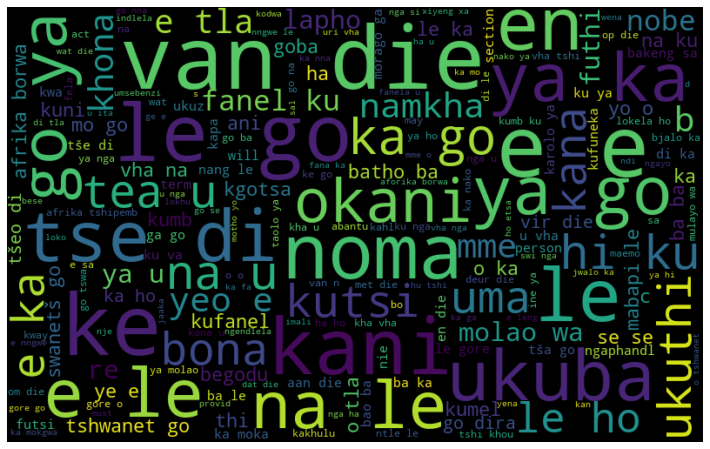

In [68]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [69]:
## visualising the frequent words for test data
all_words = " ".join([sentence for sentence in df_test['cleaned_text']])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

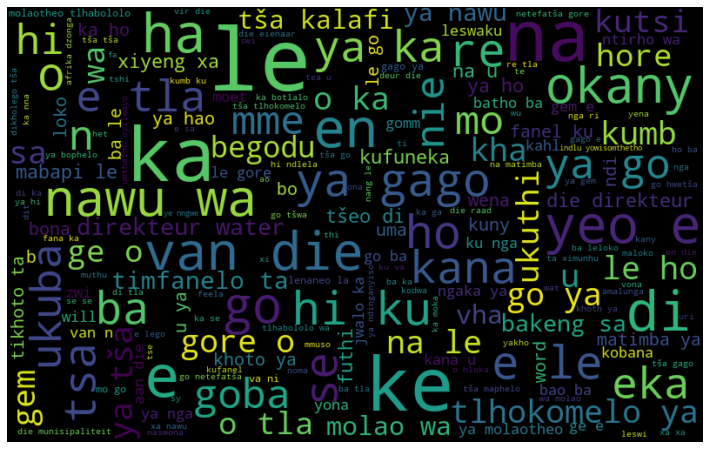

In [70]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

In [747]:
#Transforming the cleaned text from the trained data
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(all_train['cleaned_word'])

In [748]:
model_save_path = "language_vect.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(cv,file)

In [749]:
bow_test = cv.transform(df_test['cleaned_text'])

In [750]:
y = df_train['lang_id']

In [751]:
#encoding the label
le = LabelEncoder()
y = le.fit_transform(y)

In [752]:
#checking to see if encoded
y

array([9, 9, 1, ..., 1, 9, 4])

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created regression models that are able to accurately predict the three hour load shortfall. |

---

## Multinomial Naive Bayes Model

In [753]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
random_state = 42, test_size = 0.20)

In [754]:
model = MultinomialNB(alpha = 0.1, class_prior = None, fit_prior = True)
model.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [755]:
#Testing
pred = model.predict(x_test)

In [756]:
#Predicting the unseen data
model.fit(X, y)
pred_test = model.predict(bow_test)

In [757]:
pred_test = le.inverse_transform(pred_test)

In [758]:
result_model = pd.DataFrame(pred_test, columns= ['lang_id'])
result_model.head(20)

,lang_id
0,tsn
1,nbl
2,ven
3,ssw
4,afr
5,nso
6,eng
7,sot
8,zul
9,eng


In [759]:
output = pd.DataFrame({"index":df_test['index']})
submission = output.join(result_model)
submission.to_csv("submission.csv", index = False)

In [760]:
model_save_path = "multinomial_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

## LOGISTIC REGRESSION MODEL

In [512]:
#Model Training using logistic regression
log_re = LogisticRegression(multi_class='multinomial')
log_re.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [513]:
#Testing
pred_log = log_re.predict(x_test)

In [514]:
#Predicting the unseen data
log_re.fit(X, y)
pred__log_test = log_re.predict(bow_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [515]:
pred__log_test = le.inverse_transform(pred__log_test)

In [519]:
result_model = pd.DataFrame(pred__log_test, columns= ['lang_id'])
result_model.head(20)

,lang_id
0,ssw
1,nbl
2,xho
3,ssw
4,ssw
5,nso
6,ssw
7,sot
8,zul
9,xho


In [520]:
output = pd.DataFrame({"index":df_test['index']})
submission_log = output.join(result_model)
submission_log.to_csv("submission_logistic.csv", index = False)

## SVM Model

In [464]:
#Model Training using Xgboost regression
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
svc_pred = svc.predict(x_test)

In [468]:
svc.fit(X,y)
svc_pred_test = svc.predict(bow_test)

In [471]:
svc__pred_test = le.inverse_transform(svc_pred_test)

In [472]:
result_model = pd.DataFrame(svc__pred_test, columns= ['lang_id'])
result_model.head(20)

,lang_id
0,zul
1,nbl
2,xho
3,ssw
4,zul
5,nso
6,zul
7,ssw
8,zul
9,zul


In [ ]:
output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission_svc = output.join(result_svc)
submission_svc.to_csv("submission_svc.csv", index = False)

In [ ]:
model_save_path = "svc_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svc,file)

## XGBOOST CLASSIFICATION MODEL

In [763]:
# fit model no training data
model_xgb = XGBClassifier(learning_rate = 0.1,
                         n_estimators = 100,
                         max_depth = 5,
                         gamma = 0,
                         subsample = 0.8,
                         colsample_bytree = 0.8,
                         objective = 'multi:softmax',
                         nthread = 4,
                         num_class = 11,
                         seed = 27)
model_xgb.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.8, max_depth=5, nthread=4, num_class=11,
              objective='multi:softprob', seed=27, subsample=0.8)

In [764]:
xgb_pred = model_xgb.predict(x_test)

In [765]:
model_xgb.fit(X,y)
xgb_pred_test = model_xgb.predict(bow_test)

In [766]:
xgb_pred_test = le.inverse_transform(xgb_pred_test)

In [767]:
result_xgb = pd.DataFrame(xgb_pred_test, columns= ['lang_id'])
result_xgb.head(20)

,lang_id
0,nbl
1,nbl
2,ven
3,ssw
4,nbl
5,nso
6,nbl
7,sot
8,zul
9,nbl


In [ ]:
output = pd.DataFrame({"index":df_test['index']})
submission_xgb = output.join(result_xgb)
submission_xgb.to_csv("submission_xgb.csv", index = False)

In [ ]:
model_save_path = "xgb_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model_xgb,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section the relative performance of the various trained ML models on a holdout dataset was carried out. 
---

In [761]:
#Checking Logistics Regression model performance
def get_class_report(y_test, y_predict):
    #your code here
    accuracy = classification_report(y_test, y_predict)
    return accuracy

In [762]:
#Checking Logistics Regression model performance
log_report = get_class_report(y_test, pred)
print(log_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       583
           3       1.00      1.00      1.00       625
           4       1.00      1.00      1.00       618
           5       1.00      1.00      1.00       584
           6       1.00      1.00      1.00       598
           7       1.00      1.00      1.00       561
           8       1.00      1.00      1.00       634
           9       1.00      1.00      1.00       609
          10       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [768]:
#Checking Logistics Regression model performance
log_report = get_class_report(y_test, xgb_pred)
print(log_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       583
           1       0.99      1.00      1.00       615
           2       0.82      0.93      0.87       583
           3       1.00      0.97      0.99       625
           4       0.99      1.00      1.00       618
           5       0.97      0.90      0.93       584
           6       0.98      0.99      0.98       598
           7       1.00      1.00      1.00       561
           8       1.00      1.00      1.00       634
           9       0.96      0.89      0.93       609
          10       0.88      0.89      0.89       590

    accuracy                           0.96      6600
   macro avg       0.96      0.96      0.96      6600
weighted avg       0.96      0.96      0.96      6600



In [466]:
#Checking Logistics Regression model performance
log_report = get_class_report(y_test, svc_pred)
print(log_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.00      1.00       562
           2       0.99      0.98      0.98       622
           3       1.00      1.00      1.00       603
           4       1.00      1.00      1.00       595
           5       1.00      0.99      0.99       623
           6       1.00      1.00      1.00       602
           7       1.00      1.00      1.00       566
           8       1.00      1.00      1.00       592
           9       0.97      0.99      0.98       598
          10       0.98      0.98      0.98       627

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

